## Otros modelos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

Cargamos datos

In [2]:
df = pd.read_csv('data/jj.csv', index_col=0)
print(len(df))
df.head()

84


,data
date,
1960-01-01,0.71
1960-04-01,0.63
1960-07-02,0.85
1960-10-01,0.44
1961-01-01,0.61


<Axes: xlabel='date'>

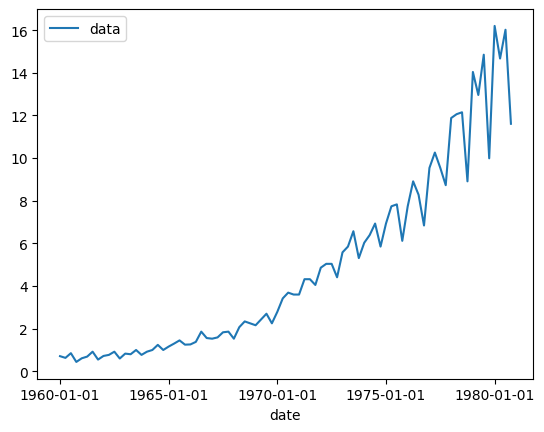

In [3]:
df.plot()

### Preparamos las features del dataset

In [4]:
for i in range(12,0,-1):
    df['t-'+str(i)] = df['data'].shift(i)

In [5]:
df.dropna(inplace=True)
df.head(15)

,data,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1
date,,,,,,,,,,,,,
1963-01-01,0.83,0.71,0.63,0.85,0.44,0.61,0.69,0.92,0.55,0.72,0.77,0.92,0.60
1963-04-02,0.80,0.63,0.85,0.44,0.61,0.69,0.92,0.55,0.72,0.77,0.92,0.60,0.83
1963-07-02,1.00,0.85,0.44,0.61,0.69,0.92,0.55,0.72,0.77,0.92,0.60,0.83,0.80
1963-10-01,0.77,0.44,0.61,0.69,0.92,0.55,0.72,0.77,0.92,0.60,0.83,0.80,1.00
1964-01-01,0.92,0.61,0.69,0.92,0.55,0.72,0.77,0.92,0.60,0.83,0.80,1.00,0.77
1964-04-01,1.00,0.69,0.92,0.55,0.72,0.77,0.92,0.60,0.83,0.80,1.00,0.77,0.92
1964-07-02,1.24,0.92,0.55,0.72,0.77,0.92,0.60,0.83,0.80,1.00,0.77,0.92,1.00
1964-10-01,1.00,0.55,0.72,0.77,0.92,0.60,0.83,0.80,1.00,0.77,0.92,1.00,1.24
1965-01-01,1.16,0.72,0.77,0.92,0.60,0.83,0.80,1.00,0.77,0.92,1.00,1.24,1.00


In [6]:
df.tail(30)

,data,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1
date,,,,,,,,,,,,,
1973-07-02,6.570000,3.690000,3.600000,3.600000,4.320000,4.320000,4.050000,4.860000,5.040000,5.040000,4.410000,5.580000,5.850000
1973-10-01,5.310000,3.600000,3.600000,4.320000,4.320000,4.050000,4.860000,5.040000,5.040000,4.410000,5.580000,5.850000,6.570000
1974-01-01,6.030000,3.600000,4.320000,4.320000,4.050000,4.860000,5.040000,5.040000,4.410000,5.580000,5.850000,6.570000,5.310000
1974-04-02,6.390000,4.320000,4.320000,4.050000,4.860000,5.040000,5.040000,4.410000,5.580000,5.850000,6.570000,5.310000,6.030000
1974-07-02,6.930000,4.320000,4.050000,4.860000,5.040000,5.040000,4.410000,5.580000,5.850000,6.570000,5.310000,6.030000,6.390000
1974-10-01,5.850000,4.050000,4.860000,5.040000,5.040000,4.410000,5.580000,5.850000,6.570000,5.310000,6.030000,6.390000,6.930000
1975-01-01,6.930000,4.860000,5.040000,5.040000,4.410000,5.580000,5.850000,6.570000,5.310000,6.030000,6.390000,6.930000,5.850000
1975-04-02,7.740000,5.040000,5.040000,4.410000,5.580000,5.850000,6.570000,5.310000,6.030000,6.390000,6.930000,5.850000,6.930000
1975-07-02,7.830000,5.040000,4.410000,5.580000,5.850000,6.570000,5.310000,6.030000,6.390000,6.930000,5.850000,6.930000,7.740000


### Dividimos en train test

In [7]:
X = df.iloc[:,1:].values
Y = df.iloc[:,0].values

X_train = X[:60]
X_test = X[60:]
y_train = Y[:60]
y_test = Y[60:]

print("Shape X_train:",X_train.shape)
print("Shape X_test:",X_test.shape)
print("Shape y_train:",y_train.shape)
print("Shape y_test:",y_test.shape)

Shape X_train: (60, 12)
Shape X_test: (12, 12)
Shape y_train: (60,)
Shape y_test: (12,)


In [8]:
pd.DataFrame(X_test)

,0,1,2,3,4,5,6,7,8,9,10,11
0,6.930000,7.740000,7.830000,6.120000,7.740000,8.910000,8.280000,6.840000,9.540000,10.260000,9.540000,8.729999
1,7.740000,7.830000,6.120000,7.740000,8.910000,8.280000,6.840000,9.540000,10.260000,9.540000,8.729999,11.880000
2,7.830000,6.120000,7.740000,8.910000,8.280000,6.840000,9.540000,10.260000,9.540000,8.729999,11.880000,12.060000
3,6.120000,7.740000,8.910000,8.280000,6.840000,9.540000,10.260000,9.540000,8.729999,11.880000,12.060000,12.150000
4,7.740000,8.910000,8.280000,6.840000,9.540000,10.260000,9.540000,8.729999,11.880000,12.060000,12.150000,8.910000
5,8.910000,8.280000,6.840000,9.540000,10.260000,9.540000,8.729999,11.880000,12.060000,12.150000,8.910000,14.040000
6,8.280000,6.840000,9.540000,10.260000,9.540000,8.729999,11.880000,12.060000,12.150000,8.910000,14.040000,12.960000
7,6.840000,9.540000,10.260000,9.540000,8.729999,11.880000,12.060000,12.150000,8.910000,14.040000,12.960000,14.850000
8,9.540000,10.260000,9.540000,8.729999,11.880000,12.060000,12.150000,8.910000,14.040000,12.960000,14.850000,9.990000
9,10.260000,9.540000,8.729999,11.880000,12.060000,12.150000,8.910000,14.040000,12.960000,14.850000,9.990000,16.200000


### Modelos de predicción

Implementa varios modelos de regresión para predecir la serie temporal. ¿Cuál ofrece mejor resultados?

NOTA: Para predecir los resultados de test, hay que iterar e ir prediciendo cada muestra en función del lag utilizado. 

Por ejemplo, para un lag = 3 (predecimos usando los últimos 3 registros):

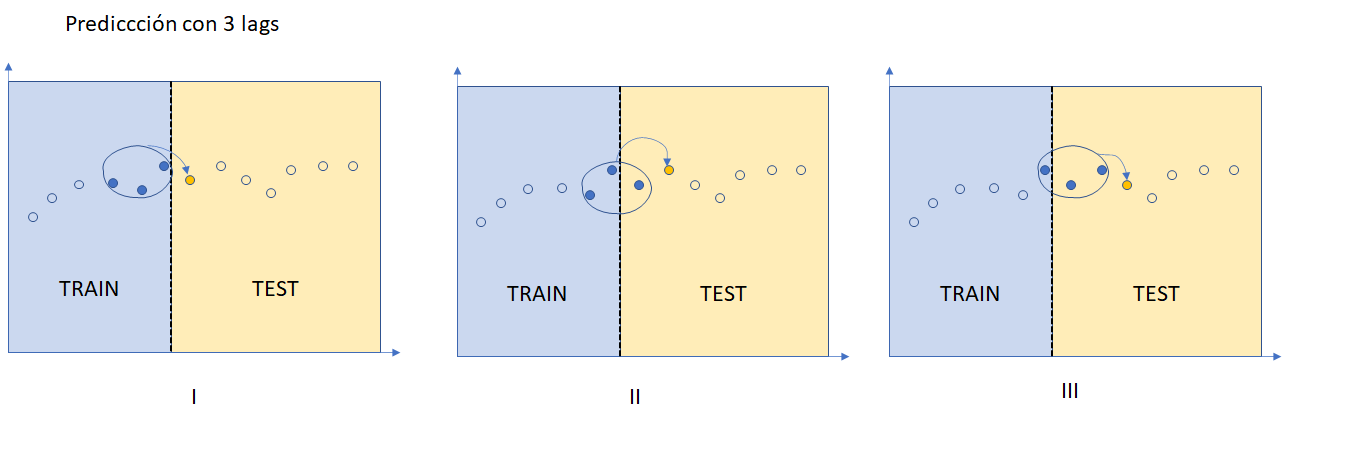

### Árbol de decisión

In [9]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor()

tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [10]:
def prediction(model, x_test):
    preds = x_test[0]
    preds_out = []
    
    for i in range(len(X_test)):
        pred = model.predict([preds])[0]
        preds_out.append(pred)

        preds2 = np.array([preds[1:]]) # Quitamos t-12, ya no se usa
        
        '''
        Concatenamos la nueva, es decir, el nuevo t-1
        '''
        preds = np.c_[preds2, np.array([pred])][0]
    return preds_out


In [11]:
preds = prediction(tree, X_test)
preds

[10.26, 9.54, 9.54, 8.28, 10.26, 9.54, 9.54, 9.54, 9.54, 9.54, 9.54, 9.54]

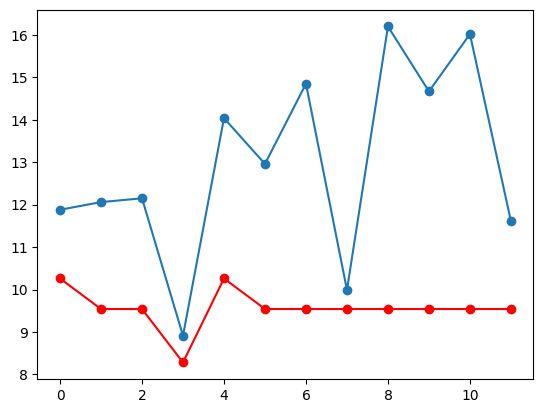

In [12]:
plt.plot(y_test,'o-')
plt.plot(preds,'o-',color='red')

### Random Forest

MSE: 16.347615491147803


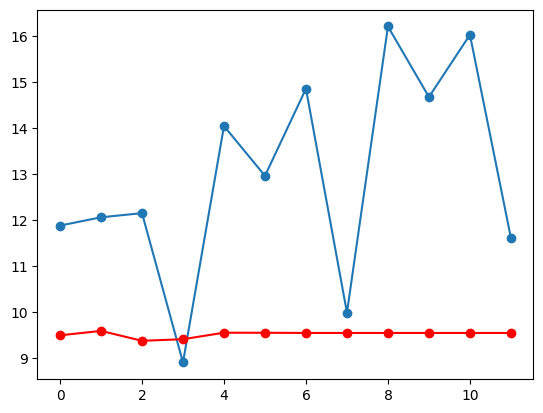

In [13]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=200, max_depth=5)
rfr.fit(X_train, y_train)

pred2 = prediction(rfr,X_test) # TENGO QUE IR PREDICIENDO UNO A UNO
print("MSE:", mean_squared_error(pred2,y_test))

plt.plot(y_test,'o-')
plt.plot(pred2,'o-',color='red')

### Regresión lineal

In [14]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

pred = lin_reg.predict(X_test) # NO HAY QUE HACERLO
print("MSE:", mean_squared_error(pred,y_test))

pred2 = prediction(lin_reg,X_test) # TENGO QUE IR PREDICIENDO UNO A UNO
print("MSE:", mean_squared_error(pred2,y_test))


MSE: 1.3371420639448237
MSE: 2.217916651619674


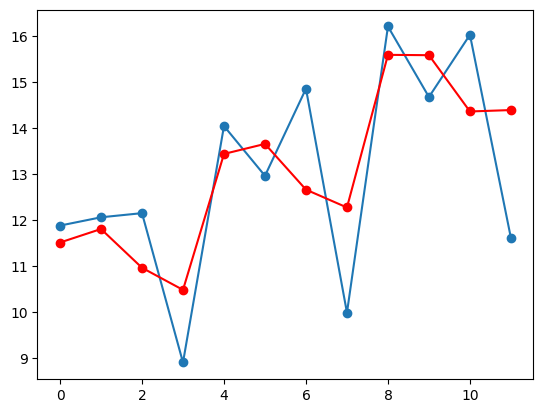

In [15]:
plt.plot(y_test,'o-')
plt.plot(pred2,'o-',color='red')